<a href="https://colab.research.google.com/github/seys-fing/scripts/blob/master/seys_muestreo_y_aliasing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Muestreo y aliasing

Ejemplo de muestreo de señales sinusoidales dentro y fuera de las hipótesis del Teorema de Muestreo. En ambos casos se muestra la reconstrucción a partir de las muestras; el caso que no se cumple el Teorema de Muestreo la reconstrucción no coincide con la señal original.

La sinusoidal de frecuencia $f_c$ kHz es muestreada con una frecuencia de muestreo $f_s$ kHz durante $T_d$ milisegundos. Para la visualización de las funciones se toman muestras a $f_v$ kHz, esta frecuencia debe ser $f_v\gg f_s$ (y no debería ser modificada) y su objetivo es solamente el despliegue de los valores de las funciones.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


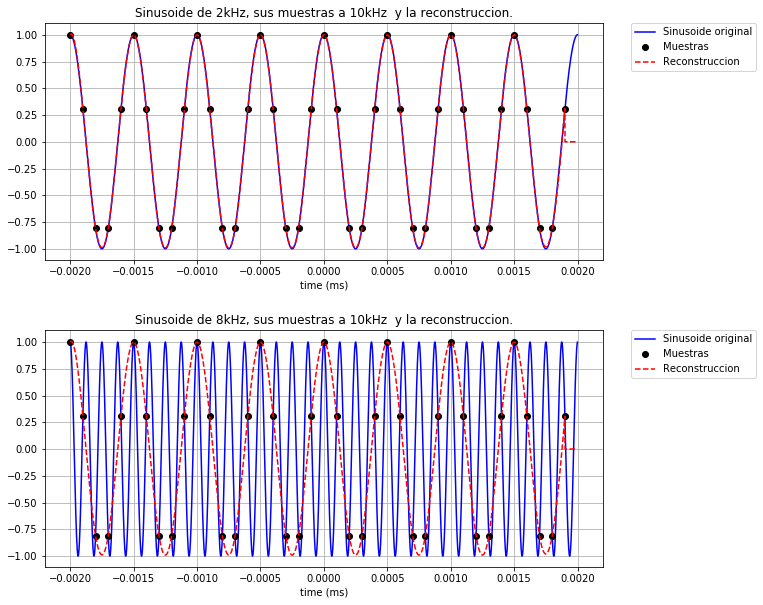

In [0]:
"""

Señales y Sistemas, 2019. IIE-FIng-Udelar.
@author: Federico Lecumberry

"""
# Importar funciones necesarias
import numpy as np
import matplotlib.pyplot as plt 
from scipy import interpolate

# 
# Estas son las variables que se deberían modificar
# 
fs = 10 # Frecuencia de muestreo en kHz.
fc = np.array([2, 8]) # Frecuencias de la sinusoides en kHz.
Td = 4 # En milisegundos.


# Corrección de los valores numéricos de las variables.
fv = 1000; # Frecuencia para visualización en kHz.
fv = fv*1000
fs = fs*1000
fc = fc*1000
Td = float(Td)/1000

# Número de puntos en la visualización y en el muestreo.
Nv = Td*fv
Ns = Td*fs

# Vectores de tiempo para visualización (v) y muestreo (s).
tiempo_v = np.linspace(np.floor(-Nv/2)/fv, np.floor((Nv-1)/2)/fv, num=Nv)
tiempo_s = np.linspace(np.floor(-Ns/2)/fs, np.floor((Ns-1)/2)/fs, num=Ns)

ind_subplot = 0
fig, [ax1, ax2] = plt.subplots(2,1,figsize=(10, 10))  
for fci in fc:
    ind_subplot = ind_subplot + 1
    
    # Sinusoide de frecuencia fci evaluada en los tiempos de visualización.
    seno_v = np.cos(2*np.pi*fci*tiempo_v);
    # Sinusoide de frecuencia fci evaluada en los tiempos de muestreo.
    seno_s = np.cos(2*np.pi*fci*tiempo_s);
    
    # Interpolación de sinusoide muestreada.
    seno_r = interpolate.spline(tiempo_s,seno_s,tiempo_v);    
    
    # Plot de la sinusoidal, sus muestras y la reconstrucción.     
    plt.subplot(2,1,ind_subplot)
    line_seno_v, = plt.plot(tiempo_v, seno_v, 'b-', label='Sinusoide original')
    line_seno_s, = plt.plot(tiempo_s, seno_s, 'ko', label='Muestras')
    line_seno_r, = plt.plot(tiempo_v, seno_r, 'r--', label='Reconstruccion')
    plt.legend(handles=[line_seno_v,line_seno_s,line_seno_r])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


    plt.xlabel('time (ms)')
    plt.title("Sinusoide de %dkHz, sus muestras a %dkHz  y la reconstruccion." % (fci/1000,fs/1000))
    plt.grid()   

fig.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()